Importing the required libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

Reading the file from the drive

In [2]:
df=pd.read_csv('/content/drive/MyDrive/dataset/Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Selecting the required columns to start the clustering process

In [4]:
x=df.iloc[:,[1,2,3,4]].values

Starting the Clustering process to findout how many clusters are required for the correct clustering of the data.  

In [5]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

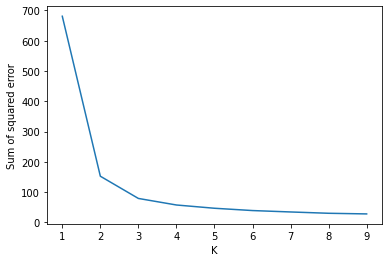

In [6]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Using elbow method we found out that there are 2 bends in the graph that is 2 and 3.

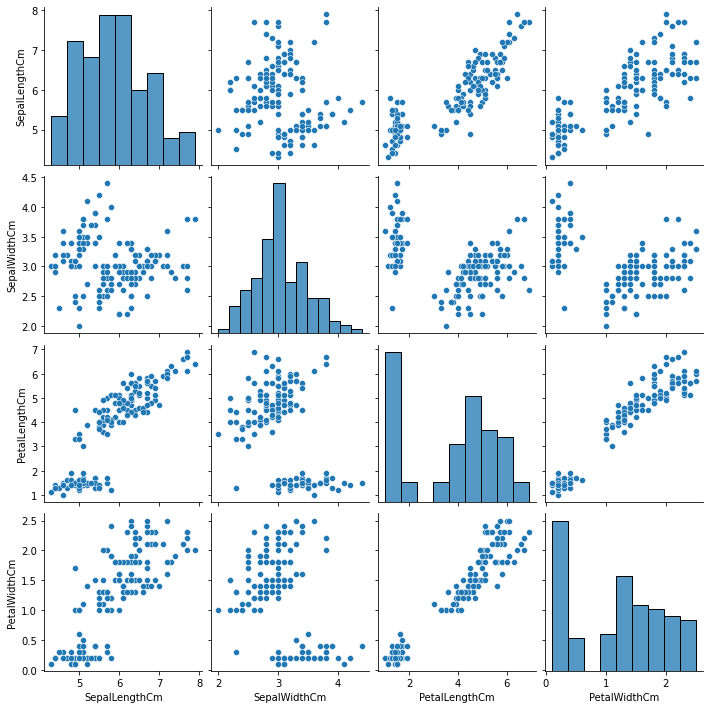

In [7]:
sns.pairplot(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

No handles with labels found to put in legend.


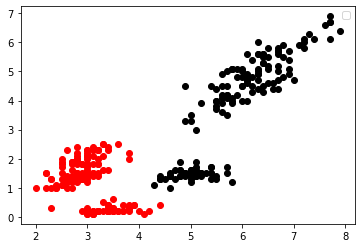

In [8]:
plt.scatter(df['SepalLengthCm'],df['PetalLengthCm'],color="black")
plt.scatter(df['SepalWidthCm'],df['PetalWidthCm'],color='red')
plt.legend()

#Machine for 2 clusters 

Calling the K-Means clustering and fitting the required features in the algorithm

In [9]:
km1=KMeans(n_clusters=2)
y_pred=km1.fit_predict(x)

In [10]:
df["cluster"]=y_pred

Adding the clustered data as new column.

In [11]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1


In [12]:
km1.cluster_centers_

array([[5.00566038, 3.36037736, 1.56226415, 0.28867925],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

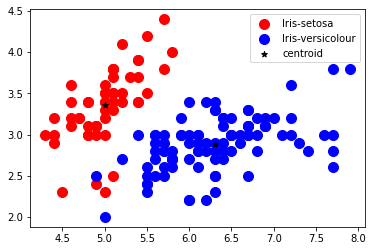

In [13]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='black',label="centroid",marker="*")
plt.legend()

In [14]:
df['cluster'].value_counts()

1    97
0    53
Name: cluster, dtype: int64

#Machine for 3 Clusters

Calling the k-means algorithm and fitting the required features in the algorithm.

In [15]:
km2=KMeans(n_clusters=3)
y_pred1=km2.fit_predict(x)

In [16]:
df["cluster2"]=y_pred1

In [17]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [20]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,cluster2
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1,2


In [18]:
km2.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

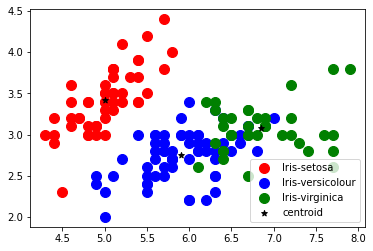

In [19]:
plt.scatter(x[y_pred1 == 0, 0], x[y_pred1 == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred1 == 1, 0], x[y_pred1== 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred1 == 2, 0], x[y_pred1== 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color='black',label="centroid",marker="*")
plt.legend()